<a href="https://colab.research.google.com/github/kartik2627/linear_regression/blob/main/Linear_Regression_Handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression Handson**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('new_insurance_data.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


# The above dataset consist of historical data of past clients, has been given by Insuarance company.
# Problem Statement : Create an ML model that can Predict the insurance charges of the new clients.

**EDA - Exploratory Data Analysis**

Data cleaning

datatypes

null values

duplicate

dealing with outliers

Visual Analyis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.isnull().sum().sum()

52

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
#  checking the duplicates
df.duplicated().sum()

0

In [ ]:
# in case we have duplicates
# df.drop_duplicates(inplace=True)

In [ ]:
#checking for outliers  ---

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

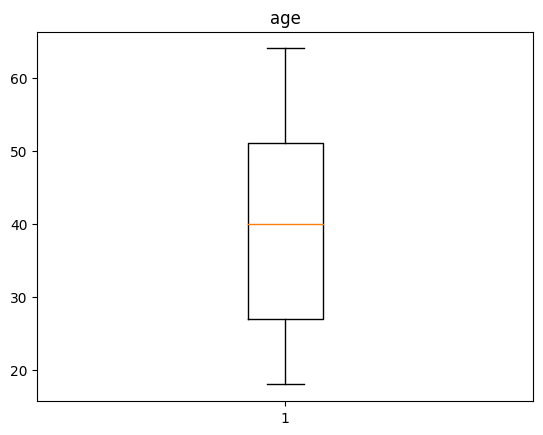

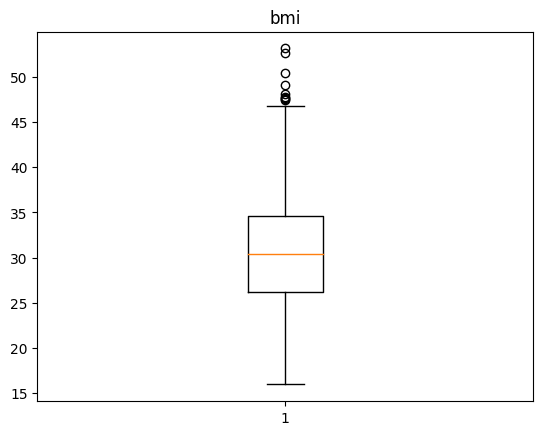

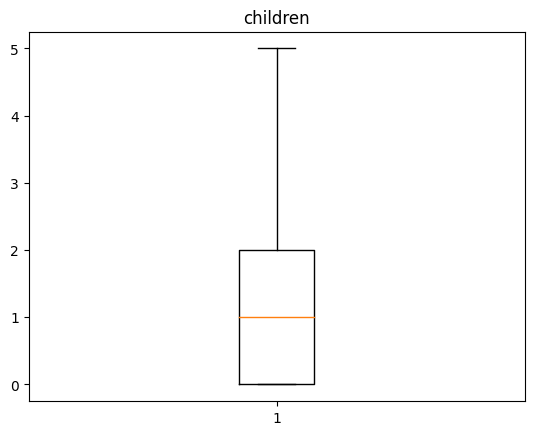

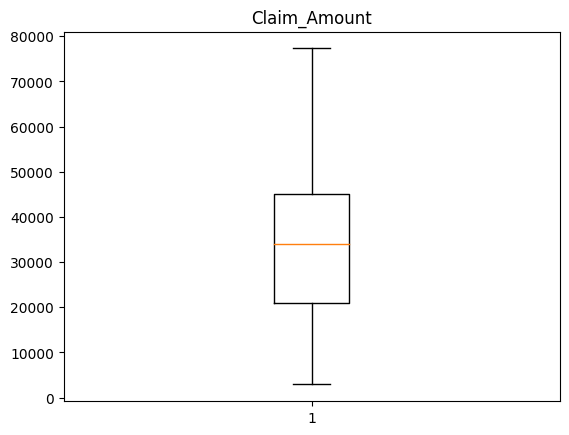

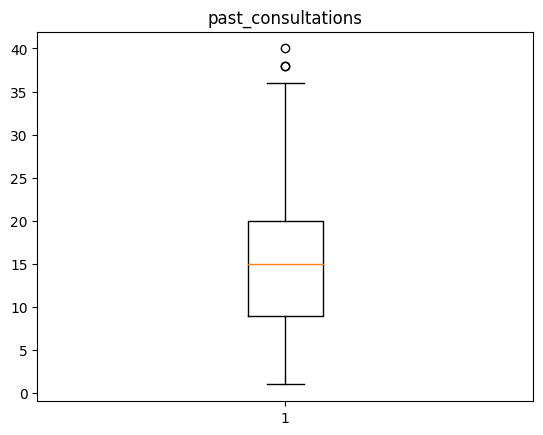

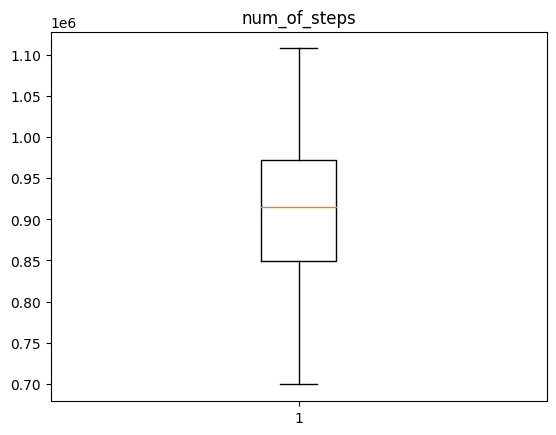

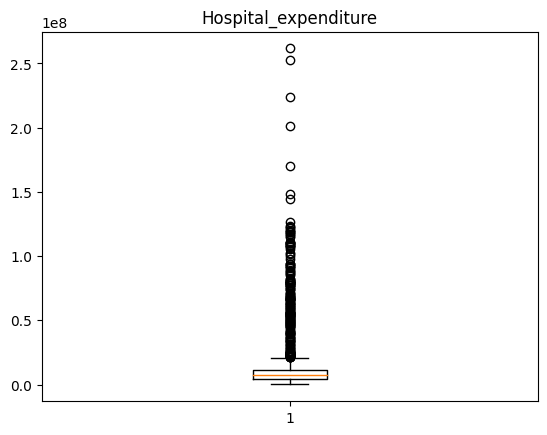

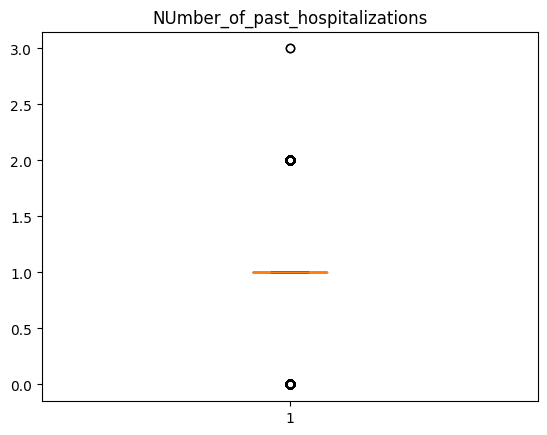

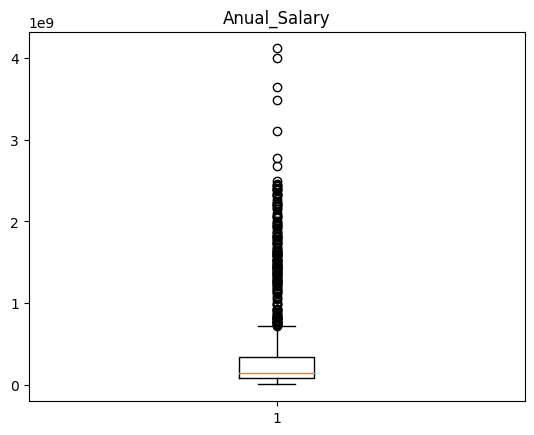

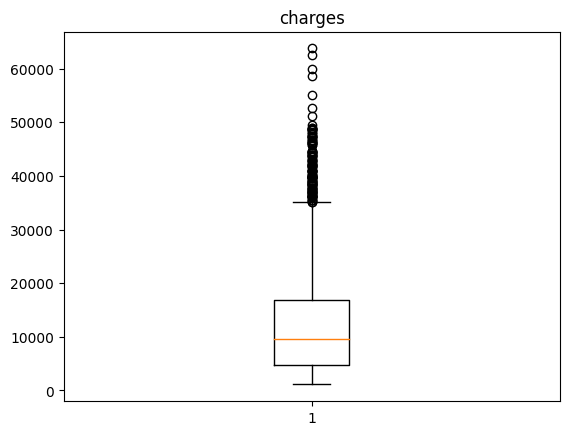

In [ ]:
for col in df.columns:
  if df[col].dtype!="object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
df['NUmber_of_past_hospitalizations'].value_counts()

,count
NUmber_of_past_hospitalizations,
1.0,927
2.0,221
0.0,137
3.0,2


In [ ]:

out_cols=['bmi','past_consultations','Hospital_expenditure','Anual_Salary','charges']

In [ ]:
for col in out_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,male,20.13,2.0,yes,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,southeast,18767.73770
1041,24.0,female,27.60,0.0,no,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,southwest,18955.22017
1046,29.0,female,27.94,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.90,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400


In [ ]:
# #Visual Analysis
# Create different plots to know relations or inferences from the data

In [ ]:
# Data preprocessing

#label Encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])
df["region"]=le.fit_transform(df["region"])


In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.13,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2,18767.73770
1041,24.0,0,27.60,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3,18955.22017
1046,29.0,0,27.94,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.90,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400


# **Feature Selection**

In [ ]:
# correlation
#VIF- variance inflation factor
#RFE -- Recursive Feature Elimination
# etc

In [ ]:
# correlation
df.corr()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.003647,0.157363,0.046903,-0.205838,0.106907,0.178307,0.763756,0.161881,0.527364,0.508866,0.018011,0.682315
sex,-0.003647,1.000000,0.010777,0.022200,0.020767,-0.033575,0.001858,-0.058674,-0.004635,-0.082260,-0.025345,-0.017551,-0.039046
bmi,0.157363,0.010777,1.000000,0.012556,-0.203690,0.013019,0.017543,0.043881,0.013951,0.022507,0.007997,0.160247,0.019630
children,0.046903,0.022200,0.012556,1.000000,-0.028992,0.037777,0.043747,0.219064,-0.008496,0.309678,0.066027,0.049654,0.131216
smoker,-0.205838,0.020767,-0.203690,-0.028992,1.000000,0.144309,0.141036,0.297142,0.274776,0.084012,0.506264,-0.016182,0.435330
Claim_Amount,0.106907,-0.033575,0.013019,0.037777,0.144309,1.000000,0.070665,0.187298,0.050630,0.108704,0.169931,0.004817,0.194932
past_consultations,0.178307,0.001858,0.017543,0.043747,0.141036,0.070665,1.000000,0.265269,0.088732,0.135027,0.273144,0.022856,0.286770
num_of_steps,0.763756,-0.058674,0.043881,0.219064,0.297142,0.187298,0.265269,1.000000,0.309669,0.715836,0.794464,-0.044130,0.942969
Hospital_expenditure,0.161881,-0.004635,0.013951,-0.008496,0.274776,0.050630,0.088732,0.309669,1.000000,0.131773,0.378125,0.019383,0.366163
NUmber_of_past_hospitalizations,0.527364,-0.082260,0.022507,0.309678,0.084012,0.108704,0.135027,0.715836,0.131773,1.000000,0.373849,-0.049122,0.532328


<Axes: >

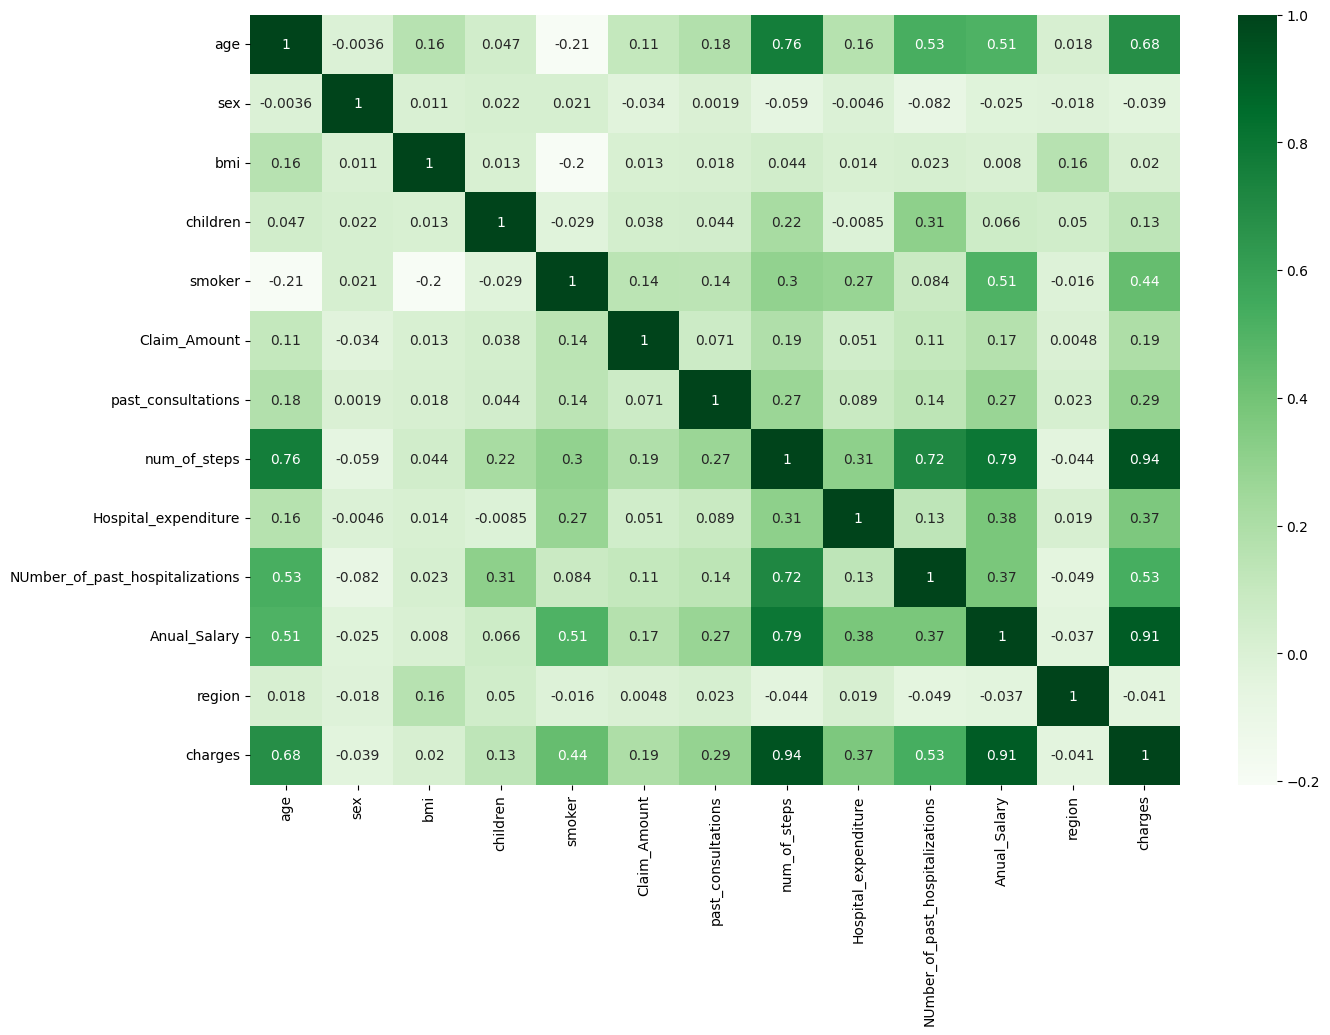

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [ ]:
imp_col=['age','num_of_steps','NUmber_of_past_hospitalizations', 'Anual_Salary']

In [ ]:
imp_col

['age', 'num_of_steps', 'NUmber_of_past_hospitalizations', 'Anual_Salary']

In [ ]:
# Defining the independent and dependent columns
X=df[imp_col]
X  # independent variables

,age,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,715428.0,0.0,5.578497e+07
1,18.0,699157.0,0.0,1.370089e+07
2,18.0,702341.0,0.0,7.352311e+07
3,18.0,700250.0,0.0,7.581968e+07
4,18.0,711584.0,0.0,2.301232e+07
...,...,...,...,...
1036,43.0,984247.0,1.0,3.687871e+08
1041,24.0,980010.0,1.0,3.743228e+08
1046,29.0,993751.0,1.0,3.712188e+08
1048,31.0,989387.0,1.0,3.812895e+08


In [ ]:
y=df["charges"]
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1036,18767.73770
1041,18955.22017
1046,19107.77960
1048,19199.94400


# **Model Building part**

In [ ]:
#splitting data into training and testing
#defining a model
#training a model
#testing a model
#Evaluation of performance of model

In [ ]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=7)

In [ ]:
x_train

,age,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary
83,20.0,760215.0,0.0,5.323287e+07
981,62.0,962029.0,1.0,3.199317e+08
636,50.0,922210.0,1.0,1.188551e+08
352,29.0,851625.0,1.0,8.499737e+07
347,25.0,859982.0,1.0,1.100850e+08
...,...,...,...,...
619,49.0,900391.0,1.0,1.343365e+08
537,44.0,891626.0,1.0,1.201369e+08
572,46.0,895100.0,1.0,1.177695e+08
213,28.0,822164.0,1.0,4.703397e+07


from matplotlib import pyplot as plt
x_train['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['num_of_steps'].plot(kind='hist', bins=20, title='num_of_steps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['NUmber_of_past_hospitalizations'].plot(kind='hist', bins=20, title='NUmber_of_past_hospitalizations')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['Anual_Salary'].plot(kind='hist', bins=20, title='Anual_Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='age', y='num_of_steps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='num_of_steps', y='NUmber_of_past_hospitalizations', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='NUmber_of_past_hospitalizations', y='Anual_Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_train['num_of_steps'].plot(kind='line', figsize=(8, 4), title='num_of_steps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_train['NUmber_of_past_hospitalizations'].plot(kind='line', figsize=(8, 4), title='NUmber_of_past_hospitalizations')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_train['Anual_Salary'].plot(kind='line', figsize=(8, 4), title='Anual_Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
y_train

,charges
83,1964.78000
981,15019.76005
636,8827.20990
352,4906.40965
347,4877.98105
...,...
619,8601.32930
537,7419.47790
572,8026.66660
213,3277.16100


In [ ]:
x_test

,age,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary
906,55.0,942032.0,1.0,2.008540e+08
290,34.0,851188.0,1.0,1.068418e+08
305,28.0,844793.0,1.0,5.843714e+07
970,63.0,945893.0,1.0,2.491297e+08
254,21.0,821333.0,1.0,1.127089e+08
...,...,...,...,...
605,45.0,922646.0,1.0,1.227101e+08
481,33.0,889432.0,1.0,1.043240e+08
856,58.0,940048.0,1.0,1.987985e+08
204,21.0,814668.0,1.0,5.602968e+07


In [ ]:
y_test

,charges
906,13047.33235
290,4320.41085
305,4438.26340
970,14451.83515
254,3861.20965
...,...
605,8515.75870
481,6666.24300
856,12222.89830
204,3180.51010


# **Model Building **

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()   # raw model/ new born child who have not learnt any thing

In [ ]:
#training the model
model.fit(x_train,y_train)
# model has been trained

LinearRegression()

In [ ]:
#testing the model
pred=model.predict(x_test)
pred

array([12181.83809947,  5876.54605066,  4687.72214883, 13230.05705252,
        4499.71846847,  5685.1467083 ,   779.47836463,   285.2406472 ,
        2882.71030353,  2967.49681002,  2856.7986057 , 10770.08631115,
       11184.36985527,  4175.50559236, 11856.8880281 ,  1609.12056609,
       17513.73615464, 11469.19507361, 17503.87958175,   643.56670169,
        3672.47745752, 14767.42977838, 13332.07924456,   229.37371775,
        2303.79035131,  4026.4822949 ,  3932.47159575,  9291.21874961,
        8323.13095321, 16196.32548035, 13484.7652328 ,  4564.75133461,
       11260.42972871,  4268.76571752,  6049.17976853,  9228.8955871 ,
       11873.59452791,  6966.87560426,  6767.6998853 , 12658.4005571 ,
        6765.68224421,  9437.71829147,  4444.47546862,  8891.16780122,
         576.35573945,  1542.45418172, 10455.00567036,  9870.20253379,
       17424.89510916,  5511.91170671, 18006.6064334 ,  3996.99315226,
       16165.94410267, 10124.15604381, 16422.5133805 ,  8296.46091002,
      

In [ ]:
y_test

,charges
906,13047.33235
290,4320.41085
305,4438.26340
970,14451.83515
254,3861.20965
...,...
605,8515.75870
481,6666.24300
856,12222.89830
204,3180.51010


In [ ]:
# Evaluation of the model
from sklearn.metrics import *

In [ ]:
# How : worst your model is : go for Error parameters:  Root mean squared Error
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse

804.6719666882539

In [ ]:
Error_df =pd.DataFrame({"actual":y_test,"predicted":pred})

In [ ]:
Error_df

,actual,predicted
906,13047.33235,12181.838099
290,4320.41085,5876.546051
305,4438.26340,4687.722149
970,14451.83515,13230.057053
254,3861.20965,4499.718468
...,...,...
605,8515.75870,9797.792735
481,6666.24300,7801.461978
856,12222.89830,12030.383015
204,3180.51010,3122.161377


In [ ]:
Error_df["Error"]=Error_df["actual"] -Error_df["predicted"]

In [ ]:
Error_df

,actual,predicted,Error
906,13047.33235,12181.838099,865.494251
290,4320.41085,5876.546051,-1556.135201
305,4438.26340,4687.722149,-249.458749
970,14451.83515,13230.057053,1221.778097
254,3861.20965,4499.718468,-638.508818
...,...,...,...
605,8515.75870,9797.792735,-1282.034035
481,6666.24300,7801.461978,-1135.218978
856,12222.89830,12030.383015,192.515285
204,3180.51010,3122.161377,58.348723


In [ ]:
#hOW GOOD YOUR MODEL IS :
r2_score(y_test,pred)*100

96.67311195986325